In [12]:
import pandas as pd
import geopandas

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

from dbconf import get_engine

In [16]:
gdf = geopandas.read_postgis("SELECT * FROM shape WHERE type='region'", con=get_engine(), geom_col='geometry')

In [19]:
regions = dict(zip(gdf.name, gdf.id))

In [8]:
df = pd.read_excel('../input/data.local/tnbs_garbage/S 202 Table 12.12- Percentage of Households by Region and Type of Refuse Disposal.xlsx',
                  skiprows=3)

In [32]:
rows = []

for i, row in df.iterrows():
    name = row['Region']
    
    if name == 'Dar es Salaam':
        name = 'Dar-es-salaam'
        
    if name not in regions:
        #print(name)
        continue
        
    rows.append({
        'id': regions[name],
        'year': 2012,
        'value': row['Regularly\nCollected'] + row['Irregularly\nCollected']
    })

In [33]:
pdf = pd.DataFrame(rows)

<AxesSubplot:>

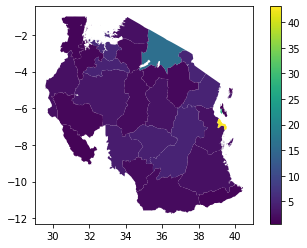

In [36]:
gdf.merge(pdf, on='id').plot(column='value', legend=True)